**PBL PROJECT**

In [ ]:
#IMPORT DATA SET
!wget https://www.dropbox.com/s/ynd7sj9m6af7htf/Dataset.zip?dl=0
!unzip /content/Dataset.zip?dl=0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab , lab2rgb
from skimage.io import imread, imshow
import shutil
import os
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

**Working with Training Data Set**

In [ ]:
TRAIN_ROOT_DIR = "/content/training_set"
DEST = "/content/train/images"

if not os.path.exists(DEST):
  os.makedirs(DEST)

  for dir in os.listdir(TRAIN_ROOT_DIR):
    for img in os.listdir( os.path.join(TRAIN_ROOT_DIR, dir)):
      ORG = os.path.join(TRAIN_ROOT_DIR, dir, img)
      try:
        imread(ORG)
        shutil.copy(ORG, DEST)
      except:

        print(f"the image at {ORG} cannot be used ")

In [ ]:
print(len(os.listdir("/content/train/images")))
# print(len("TRAIN_ROOT_DIR"))

In [ ]:
 train_datagen=ImageDataGenerator( rescale=1/255,
                                 featurewise_center=True,
                                 rotation_range=40,
                                 horizontal_flip=True,
                                 featurewise_std_normalization=True)

In [ ]:
train=train_datagen.flow_from_directory("/content/train",
                                        target_size=(256,256),
                                        batch_size=2000,
                                  shuffle=True)

**Visualize**

In [ ]:
t_img,label=train.next()

In [ ]:
def plotImage(img_arr, label):
  plt.figure(figsize=(5,5))
  for im,l in zip(img_arr,label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis("off")
    plt.show()

In [ ]:
plotImage(t_img[:10],label[:10])


In [ ]:
t_img.shape

In [ ]:
label.shape


In [ ]:
X=[]
y=[]


In [ ]:
from skimage import color
for image in t_img:
  try:
    lab=rgb2lab(image)
    X.append(lab[:,:,0])
    y.append(lab[:,:,1:]/128)
  except:
    print('error')


In [ ]:
X_train=np.array(X)
X_train=np.expand_dims(X_train, axis=len(X_train.shape))
y_train=np.array(y)
X_train.shape,y_train.shape

**Encoder & Decoder**

In [ ]:
from keras.layers import Conv2D, MaxPool2D,UpSampling2D,Input,LeakyReLU

In [ ]:
from keras.models import Sequential


In [ ]:
#encoder

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',strides=2, input_shape=(256,256,1)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',strides=2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same',strides=2))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))



In [ ]:
# decoder

model.add(Conv2D(128,(3,3), activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(Conv2D(16,(3,3), activation='relu',padding='same'))
model.add(Conv2D(2,(3,3), activation=LeakyReLU(alpha=0.01),padding='same'))
model.add(UpSampling2D((2,2)))
model.summary()

In [ ]:
model.compile(optimizer='adam',metrics=['acc'],loss='mse')

In [ ]:
his = model.fit(X_train , y_train , epochs=30 , batch_size =32 , steps_per_epoch=X_train.shape[0]//32 , verbose=1)

Epoch 1/30
62/62 [==============================] - 78s 821ms/step - loss: 0.0187 - acc: 0.7739
Epoch 2/30
62/62 [==============================] - 60s 821ms/step - loss: 0.0086 - acc: 0.8135
Epoch 3/30
62/62 [==============================] - 51s 815ms/step - loss: 0.0082 - acc: 0.8137
Epoch 4/30
62/62 [==============================] - 50s 814ms/step - loss: 0.0078 - acc: 0.8160
Epoch 5/30
62/62 [==============================] - 50s 814ms/step - loss: 0.0078 - acc: 0.8094
Epoch 6/30
62/62 [==============================] - 51s 815ms/step - loss: 0.0081 - acc: 0.8150
Epoch 7/30
62/62 [==============================] - 50s 814ms/step - loss: 0.0078 - acc: 0.8136
Epoch 8/30
62/62 [==============================] - 50s 813ms/step - loss: 0.0078 - acc: 0.8142
Epoch 9/30
62/62 [==============================] - 51s 815ms/step - loss: 0.0077 - acc: 0.8099
Epoch 10/30
62/62 [==============================] - 50s 814ms/step - loss: 0.0076 - acc: 0.8156
Epoch 11/30
62/62 [====================

In [ ]:
model.save("./bestmodel.h5")

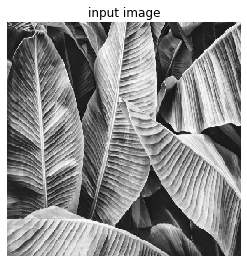

In [ ]:
img1_color=[]
path="/content/istockphoto-922764830-612x612.jpg"

img = img_to_array(
    load_img(path,target_size=(256,256,3))
)/255


plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()

In [ ]:
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]

img1_color=img1_color.reshape(img1_color.shape+(1,))

In [ ]:
output1=model.predict(img1_color)
output1 =output1*128


In [ ]:
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=output1[0]

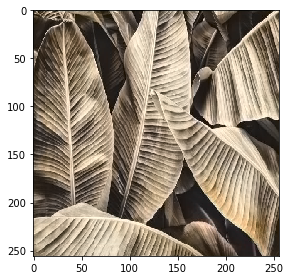

In [ ]:
imshow(lab2rgb(result))